# 引入資料庫

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 引入測試資料

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 確認資料來源型態

In [3]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# 確認資料大小

In [4]:
print('x_train shape:', x_train.shape)
print('y_test shape:', y_train.shape)
print('x_train shape:', x_test.shape)
print('y_test shape:', x_test.shape)

x_train shape: (50000, 32, 32, 3)
y_test shape: (50000, 1)
x_train shape: (10000, 32, 32, 3)
y_test shape: (10000, 32, 32, 3)


# 查看第一筆測資影像(陣列型態)

In [ ]:
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

# 將第一筆測資影像轉為圖片

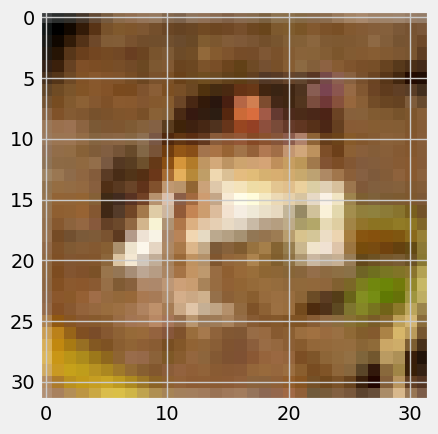

In [ ]:
img = plt.imshow(x_train[index])

# 確認影像對應到的 名字 位置

In [7]:
print('Teh image label is:', y_train[index])

Teh image label is: [6]


# 將所有確認資料名字填入相對位置，並對其影像輸出

In [ ]:
classification = ['airplane', 'autombile', 'bird',  'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Thee image class is ', classification[y_train[index][0]])

Thee image class is  frog


# 將影像標籤轉為one-hot

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# 確認結果

In [ ]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


# 確認完整對應到只有正確位置是1

In [ ]:
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# 將影像值轉為0-1

In [12]:
x_train = x_train/255
x_test = x_test/255

# 印出結果確認

In [13]:
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [14]:
# 創造模型架構
model = Sequential()

# 第一層卷基層，具 32 個 5X5 濾波器，函數為 relu
model.add(Conv2D(32, (5, 5), activation = 'relu', input_shape = (32, 32, 3)) )

# 2X2 最大池化層，降低空間維度，保留特徵
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add 第二層卷基層，具 32 個 5X5 濾波器，函數為 relu
model.add(Conv2D(32, (5, 5), activation = 'relu') )

# 2X2 最大池化層，降低空間維度，保留特徵
model.add(MaxPooling2D(pool_size = (2, 2)))

# 扁平化曾，將卷積層輸出轉一維陣列
model.add(Flatten())

# 第一個密集層，1000 神經元，使用 relu 函數
model.add(Dense(1000, activation='relu'))

# 防止過度擬合
model.add(Dropout(0.5))

# 第二個密集層，500 神經元，使用 relu 函數
model.add(Dense(500, activation='relu'))

# 防止過度擬合
model.add(Dropout(0.5))

# 第三個密集層，250 神經元，使用 relu 函數
model.add(Dense(250, activation='relu'))

# 輸出十個類別的分類問題(對應十種動物)
model.add(Dense(10, activation='softmax'))

c:\Users\Magician\Desktop\imageProject\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 使用 分類交叉商 作為損失函數分類，使用 Adam 優化算法更新權重，並追蹤準確率

In [15]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =  ['accuracy'])

# 訓練資料 對應 結果標籤，每次處理 256 樣本，20% 用來驗證結果

In [16]:
hist  = model.fit(x_train, y_train_one_hot, batch_size = 256, epochs = 10, validation_split = 0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.2513 - loss: 1.9801 - val_accuracy: 0.4689 - val_loss: 1.4391
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.4739 - loss: 1.4360 - val_accuracy: 0.5427 - val_loss: 1.2692
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.5391 - loss: 1.2747 - val_accuracy: 0.5844 - val_loss: 1.1600
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.5835 - loss: 1.1516 - val_accuracy: 0.6201 - val_loss: 1.0826
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.6263 - loss: 1.0491 - val_accuracy: 0.6308 - val_loss: 1.0443
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.6577 - loss: 0.9693 - val_accuracy: 0.6602 - val_loss: 0.9753
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.6810 - loss: 0.8999 - val_accuracy: 0.6741 - val_loss: 0.9331
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.7083 - loss: 0.8244 - 

# 評估測試資料表現

In [17]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6808 - loss: 0.9087


0.6791999936103821

# 畫出 Train(訓練集)、val(驗證集) 各自 正確率

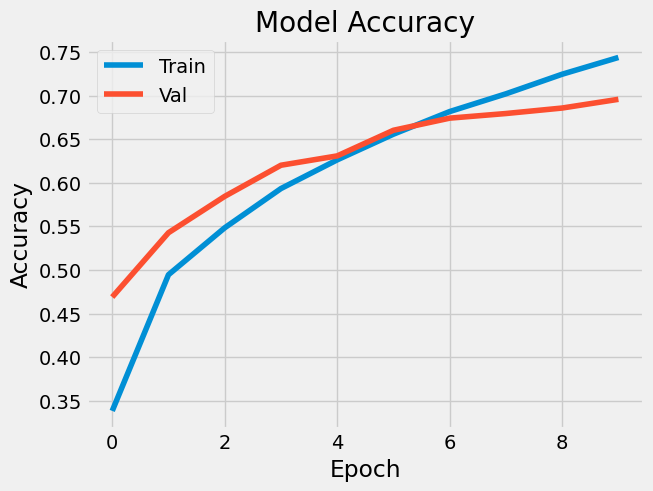

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

# 畫出 Train(訓練集)、val(驗證集) 各自 損失變化

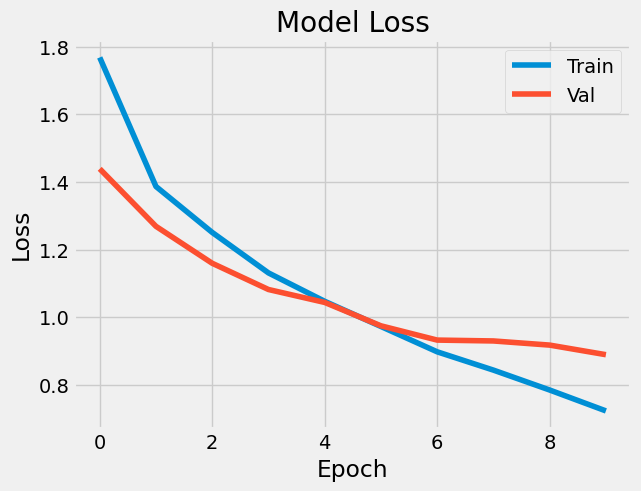

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

# 玩模型，放入未知圖片

## 選擇圖片：<br>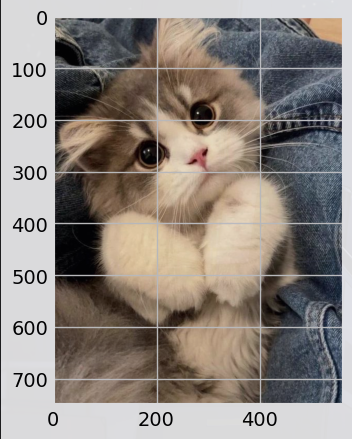

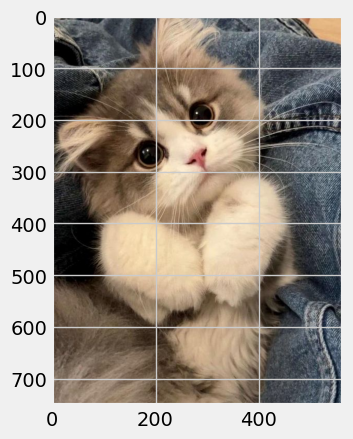

In [21]:
new_image = plt.imread('./source/cuteCat.jpg')
img = plt.imshow(new_image)

# 調整圖片大小，使符合模型

## 調整後<br>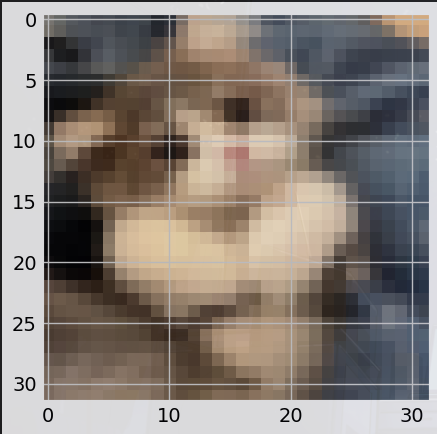

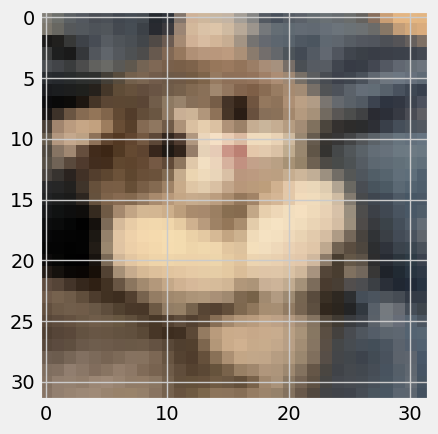

In [22]:
from skimage.transform import resize
resized_image = resize(new_image, (32, 32, 3))
img = plt.imshow(resized_image)

In [23]:
# 將圖片套入模型
predictions = model.predict(np.array([resized_image]))

# 印出結果陣列
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


array([[0.00268841, 0.00182685, 0.01743751, 0.5171996 , 0.01831696,
        0.36074468, 0.06755699, 0.00339521, 0.01027074, 0.00056308]],
      dtype=float32)

# 使用排序選出最接近陣列結果的測試資料

In [26]:
list_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x = predictions
for i in range(10):
    for j in  range (10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

# 輸出對應結果陣列的 label (3 == cat)
print(list_index)

[3, 5, 6, 4, 2, 8, 7, 0, 1, 9]


## 將陣列對應 原結果<br><br>

# 輸出前五個結果(名字、正確性)

In [27]:
maxLen = 0
for i in range(5):
    if (len(classification[list_index[i]]) > maxLen):
        maxLen = len(classification[list_index[i]])

for i in range (5):
    print(f"{classification[list_index[i]]:{maxLen}} : {round(predictions[0][list_index[i]] * 100, 2)} %")

cat  : 51.72 %
dog  : 36.07 %
frog : 6.76 %
deer : 1.83 %
bird : 1.74 %


## 輸出模型前五大預測結果<br>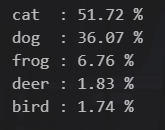

# 心得：
&emsp;&emsp;透過此次專題，我了解到影像分析之於神經網路的應用，透過真實的手做，我了解到原來都是一層層合乎邏輯推演的結果，而非全然隨機。而透過訓練模型、事先觀察模型的正確性，推測出模型可能達到的準確性，使我對此有點深入的了解。